In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## CH2 Q8

In [3]:
#(a)
college=pd.read_csv("College.csv")
display(college)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [4]:
#(b)
college2=pd.read_csv('College.csv',index_col=0) #第一column無column name
college3=college.rename({'Unnamed: 0':'College'},axis=1)#第一column有column name-College
college3=college3.set_index('College')
display(college2.head())
display(college3.head())

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
college=college3

-  Private: 大學類型，是否為私立學校（Yes 表示私立，No 表示公立）。
-  Apps: 申請該學校的學生數量（Number of applications received）。
-  Accept: 被該學校錄取的學生數量（Number of students accepted）。
-  Enroll: 實際註冊入學的學生數量（Number of new students enrolled）。
-  Top10perc: 新生中來自高中班級排名前 10% 的學生比例（Percentage of new students from the top 10% of their high school class）。
-  Top25perc: 新生中來自高中班級排名前 25% 的學生比例（Percentage of new students from the top 25% of their high school class）。
-  F.Undergrad: 全日制本科生人數（Number of full-time undergraduates）。
-  P.Undergrad: 非全日制本科生人數（Number of part-time undergraduates）。
-  Outstate: 外州學生的學費（Out-of-state tuition）。
-  Room.Board: 食宿費用（Room and board costs）。
-  Books: 書籍和學習材料費用（Estimated cost for books）。
-  Personal: 個人雜費（Estimated personal expenses）。
-  PhD: 教職員中擁有博士學位的比例（Percentage of faculty with a Ph.D.）。
-  Terminal: 教職員中擁有最高學歷（終端學位，例如博士或專業學位）的比例（Percentage of faculty with a terminal degree）。
-  S.F.Ratio: 師生比例（Student-to-faculty ratio）。
-  perc.alumni: 校友捐贈比例（Percentage of alumni who donate）。
-  Expend: 每位學生的教育支出（Instructional expenditure per student）。
-  Grad.Rate: 畢業率（Graduation rate）。

In [7]:
#(c)
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


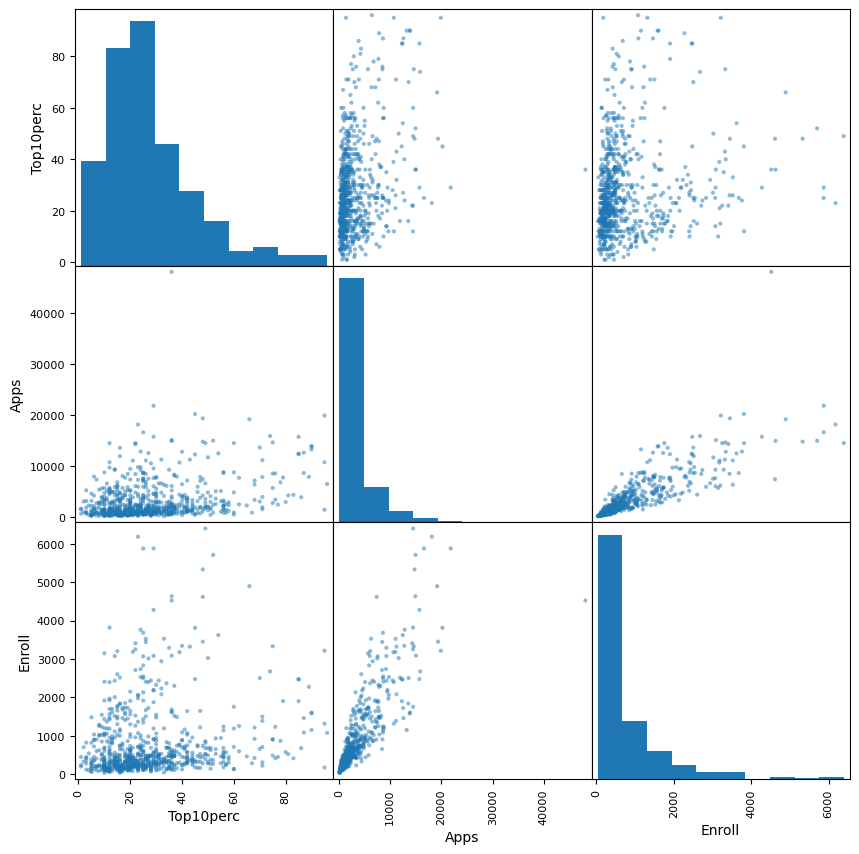

In [8]:
#(d)
sel=['Top10perc','Apps','Enroll']
selected_col=college[sel]
pd.plotting.scatter_matrix(selected_col,figsize=(10,10))
plt.show()

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

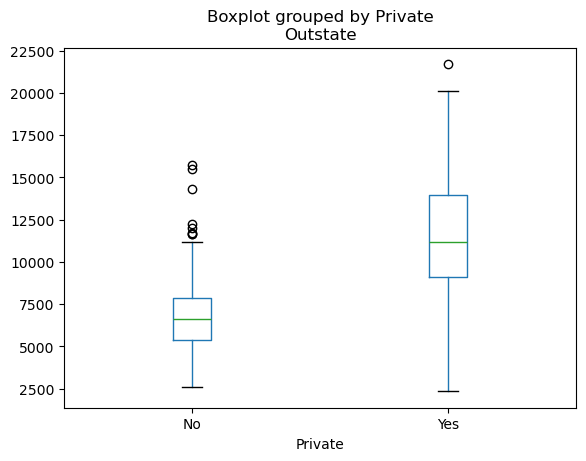

In [9]:
#(e)
college.boxplot(column='Outstate',by='Private',grid=False)
#college[college['Private'] == 'No'].describe()

In [10]:
#(f)
college['Elite']=pd.cut(college['Top10perc'],[0,50,100],labels=['No','Yes'])
college['Elite'].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64

<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

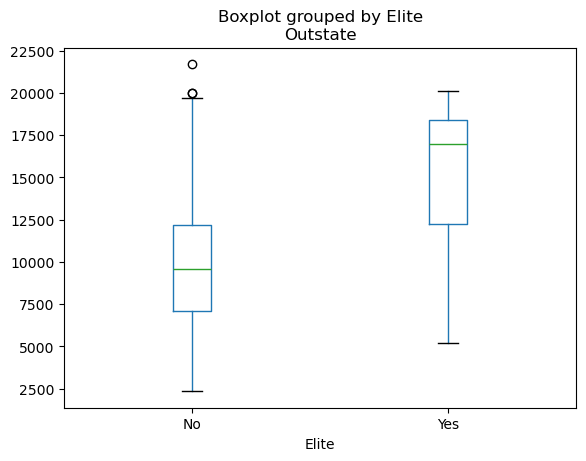

In [11]:
college.boxplot(column='Outstate',by='Elite',grid=False)

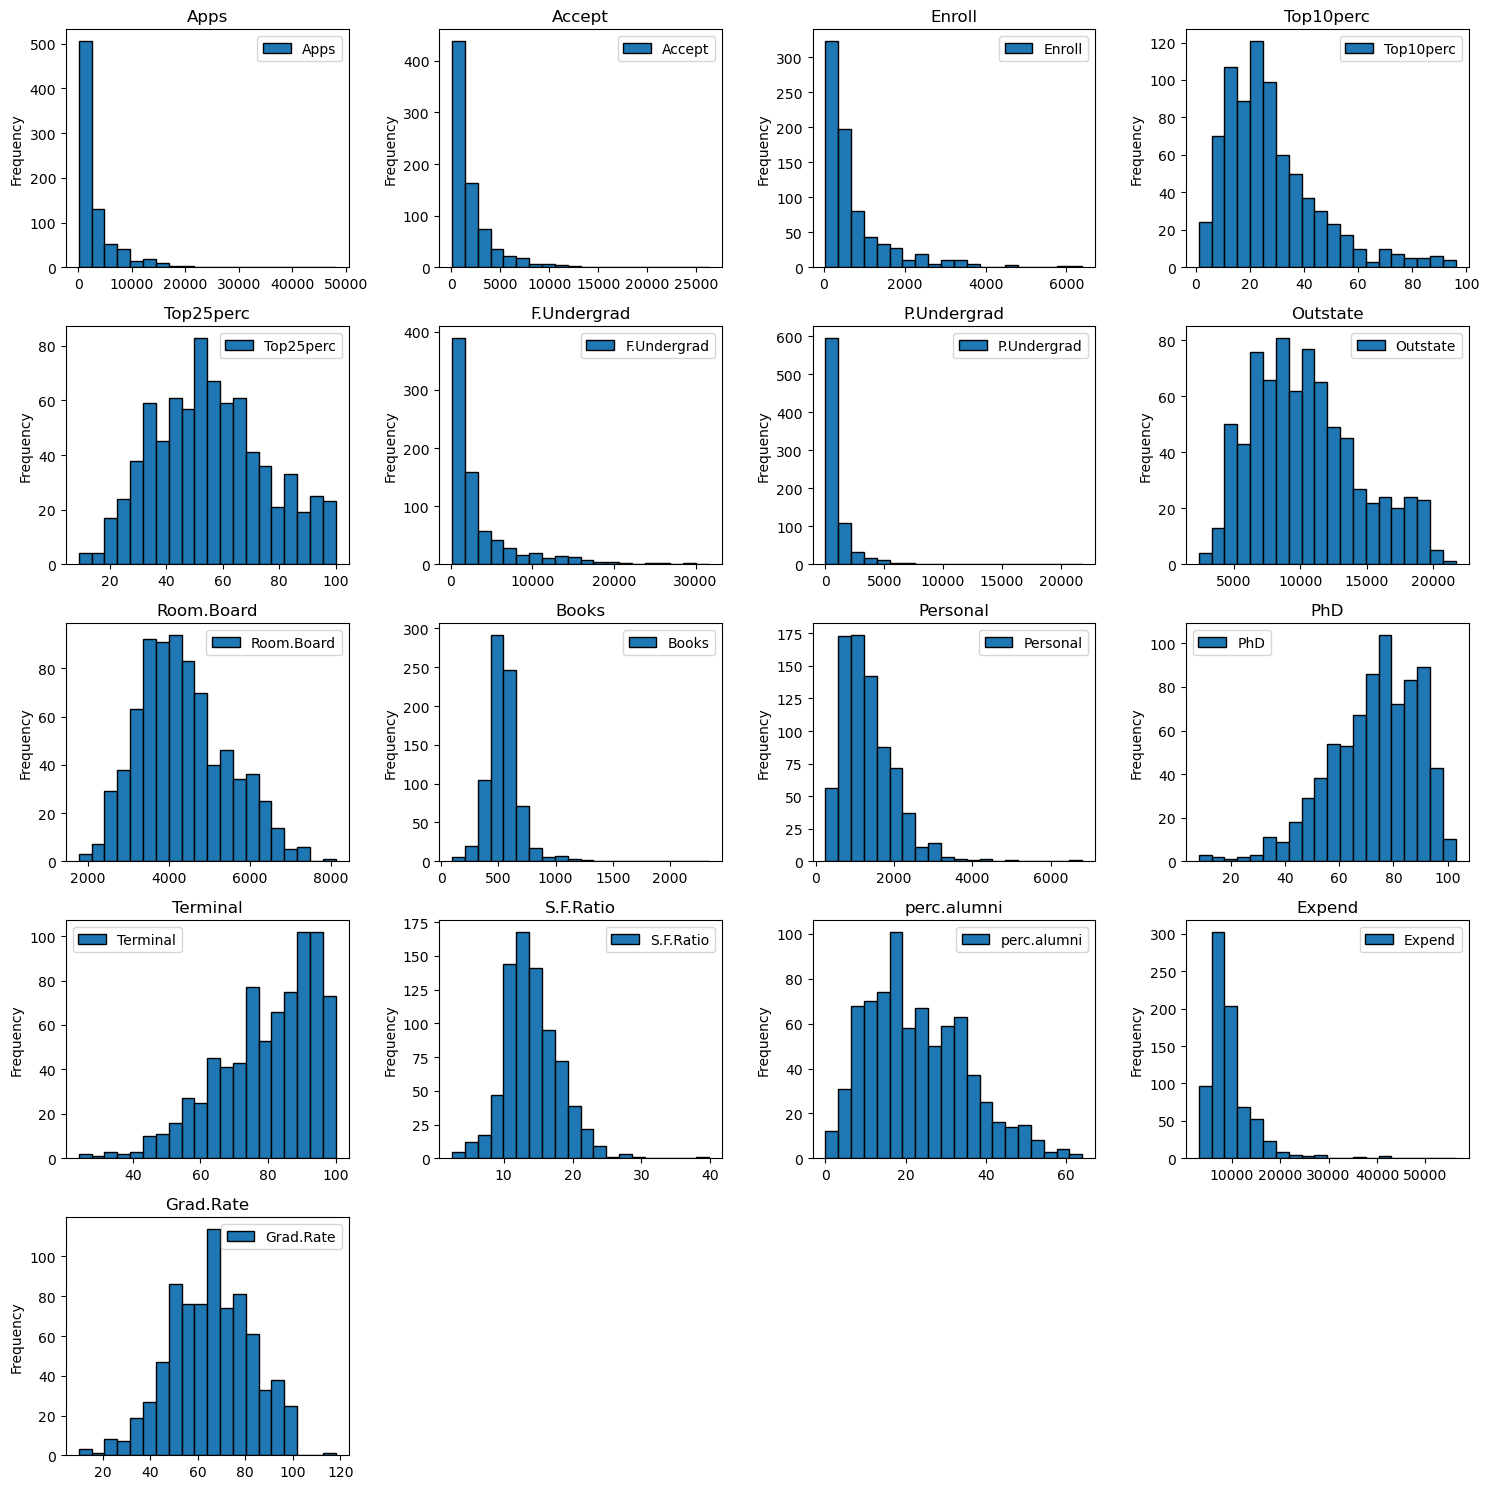

In [12]:
#(g)
col_var=college.columns
fig, axes = plt.subplots(5, 4, figsize=(15, 15))

plot_index = 0
for i in range(1, len(col_var)):
    # 確保該列為數值型
    if pd.api.types.is_numeric_dtype(college[col_var[i]]):
        # 計算當前應該繪製在哪個子圖
        row, col = plot_index // 4, plot_index % 4
        college.plot.hist(column=col_var[i], bins=20, edgecolor='black', ax=axes[row, col])
        axes[row, col].set_title(col_var[i])
        plot_index += 1
# 關閉未使用的子圖軸
for j in range(plot_index, 20):
    row, col = j // 4, j % 4
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Expend'}, xlabel='Private'>

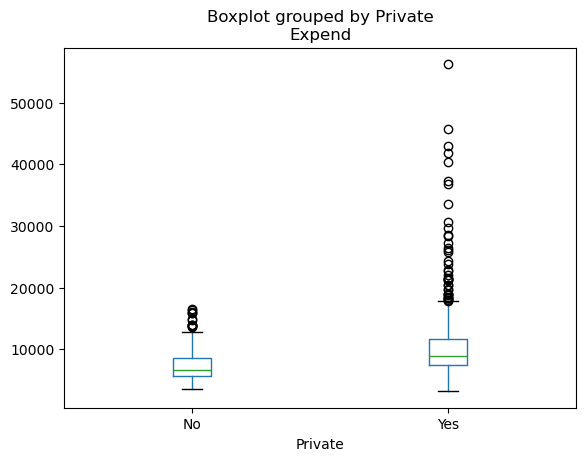

In [13]:
#(h)
#I want to know that whether private or public affect the instruction expenditure per student(Expend)
college.boxplot(column='Expend',by='Private',grid=False)

### brief summary
#### - From (e), we can see the out-of-state tuition in two catagories,public or private.Private colleges generally have higher out-of-state tuition compared to public colleges and also exhibit a larger range.
#### - From (f), a college is defined as "elite" if the proportion of students from the top 10% of their high school class is greater than 50%. On average, elite colleges have higher out-of-state tuition, while non-elite colleges have lower out-of-state tuition and a larger range.
#### - From (h), we can see the private colleges have higher expend on students, and a lots of outliers shows some private colleges provide more expand on students.In public school, each student is  provided with fewer resources.

## CH2 Q10

- **crim**: 城鎮人均犯罪率（per capita crime rate by town）  
- **zn**: 占地超過 25,000 平方英尺的住宅用地比例（proportion of residential land zoned for lots over 25,000 sq. ft.）  
- **indus**: 城鎮非零售業商業用地的比例（proportion of non-retail business acres per town）  
- **chas**: 是否臨近查爾斯河（Charles River）。1 表示臨近，0 表示不臨近（1 if tract bounds river; 0 otherwise）  
- **nox**: 氮氧化物濃度（air pollution concentration，nitric oxides concentration in parts per 10 million）  
- **rm**: 每棟住宅的房間數的平均數（average number of rooms per dwelling）  
- **age**: 1940 年以前建造的自住房比例（proportion of owner-occupied units built prior to 1940）  
- **dis**: 距離波士頓五個就業中心的加權距離（weighted distances to five Boston employment centers）  
- **rad**: 高速公路可達性指數（index of accessibility to radial highways）  
- **tax**: 每 10,000 美元的財產稅率（full-value property-tax rate per 10,000 dollars）


 
- **ptratio**: 城鎮的師生比（pupil-teacher ratio by town）  
- **lstat**: 低收入人群的百分比（percentage of lower status of the population）  
- **medv**: 房價中位數（median value of owner-occupied homes in $1000s）

In [18]:
#(a)
boston=pd.read_csv('Boston.csv',index_col=0)
display(boston)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [19]:
#(b)
num_rows = boston.shape[0]
num_columns = boston.shape[1]
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 506
Number of columns: 13


array([[<Axes: xlabel='crim', ylabel='crim'>,
        <Axes: xlabel='zn', ylabel='crim'>,
        <Axes: xlabel='indus', ylabel='crim'>,
        <Axes: xlabel='chas', ylabel='crim'>,
        <Axes: xlabel='nox', ylabel='crim'>,
        <Axes: xlabel='rm', ylabel='crim'>,
        <Axes: xlabel='age', ylabel='crim'>,
        <Axes: xlabel='dis', ylabel='crim'>,
        <Axes: xlabel='rad', ylabel='crim'>,
        <Axes: xlabel='tax', ylabel='crim'>,
        <Axes: xlabel='ptratio', ylabel='crim'>,
        <Axes: xlabel='lstat', ylabel='crim'>,
        <Axes: xlabel='medv', ylabel='crim'>],
       [<Axes: xlabel='crim', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='indus', ylabel='zn'>,
        <Axes: xlabel='chas', ylabel='zn'>,
        <Axes: xlabel='nox', ylabel='zn'>,
        <Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='age', ylabel='zn'>,
        <Axes: xlabel='dis', ylabel='zn'>,
        <Axes: xlabel='rad', ylabel='zn'>,
        <Axes: x

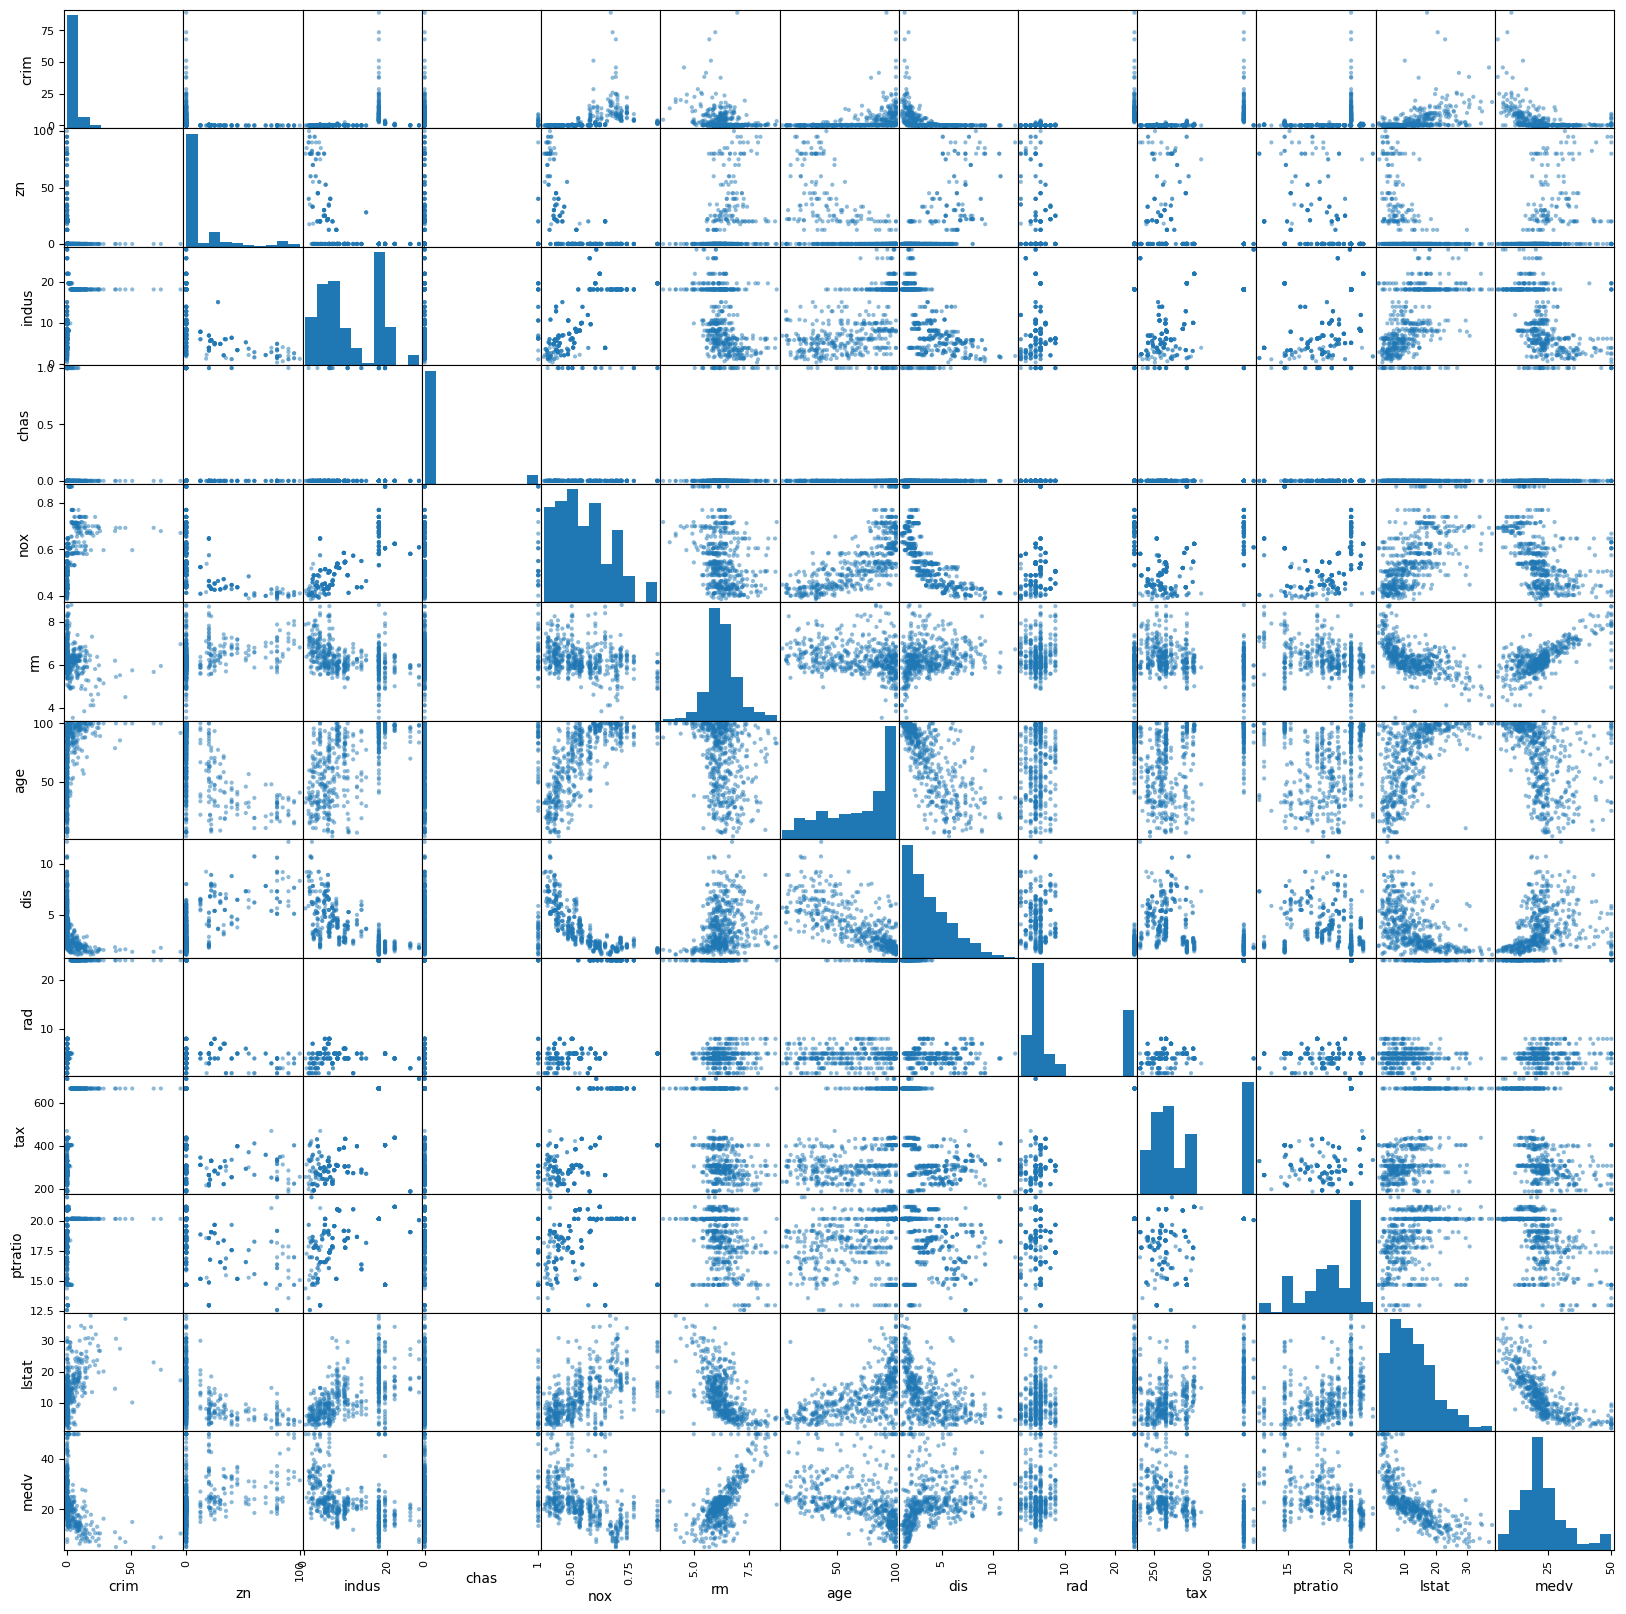

In [20]:
#(c)
pd.plotting.scatter_matrix(boston, figsize=(20, 20))


array([[<Axes: xlabel='nox', ylabel='nox'>,
        <Axes: xlabel='age', ylabel='nox'>,
        <Axes: xlabel='lstat', ylabel='nox'>,
        <Axes: xlabel='medv', ylabel='nox'>,
        <Axes: xlabel='dis', ylabel='nox'>],
       [<Axes: xlabel='nox', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='lstat', ylabel='age'>,
        <Axes: xlabel='medv', ylabel='age'>,
        <Axes: xlabel='dis', ylabel='age'>],
       [<Axes: xlabel='nox', ylabel='lstat'>,
        <Axes: xlabel='age', ylabel='lstat'>,
        <Axes: xlabel='lstat', ylabel='lstat'>,
        <Axes: xlabel='medv', ylabel='lstat'>,
        <Axes: xlabel='dis', ylabel='lstat'>],
       [<Axes: xlabel='nox', ylabel='medv'>,
        <Axes: xlabel='age', ylabel='medv'>,
        <Axes: xlabel='lstat', ylabel='medv'>,
        <Axes: xlabel='medv', ylabel='medv'>,
        <Axes: xlabel='dis', ylabel='medv'>],
       [<Axes: xlabel='nox', ylabel='dis'>,
        <Axes: xlabel='age', ylabel='dis'>,
 

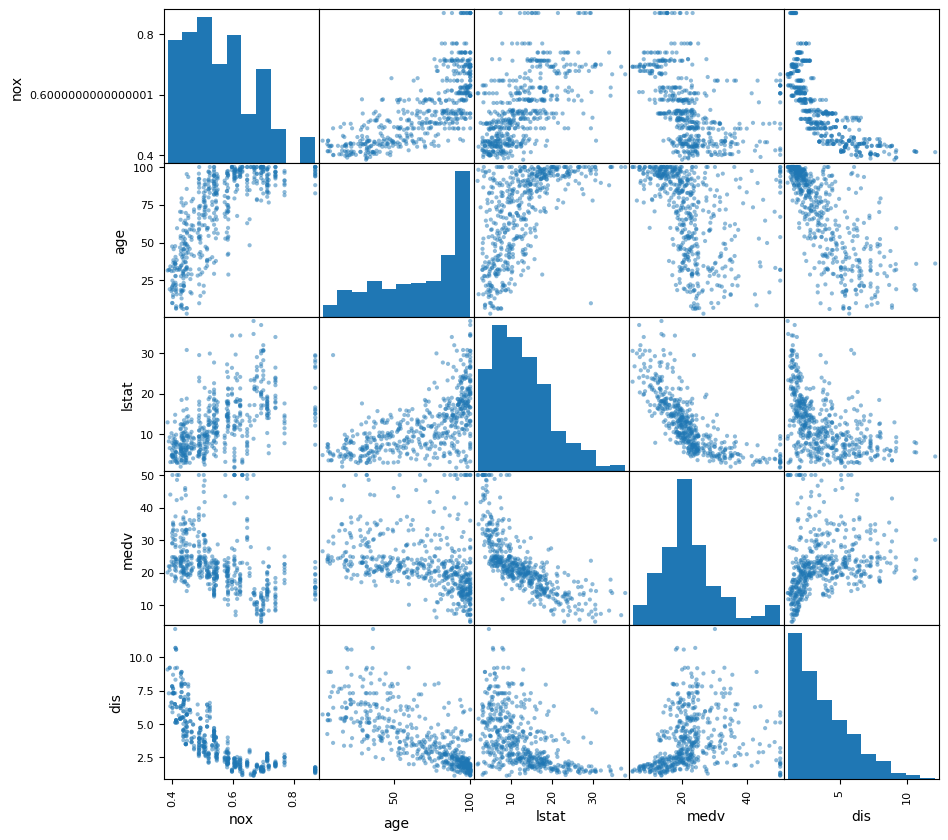

In [21]:
pd.plotting.scatter_matrix(boston[['nox','age','lstat','medv','dis']], figsize=(10,10))


- #### nox and age 有正相關
- #### age and lstat 有正相關
- #### medv and lstat 有負相關
- #### dis and nox 有負相關
- #### dis and age 有負相關
- #### dis and lstat 有負相關
- #### dis and medv 有正相關

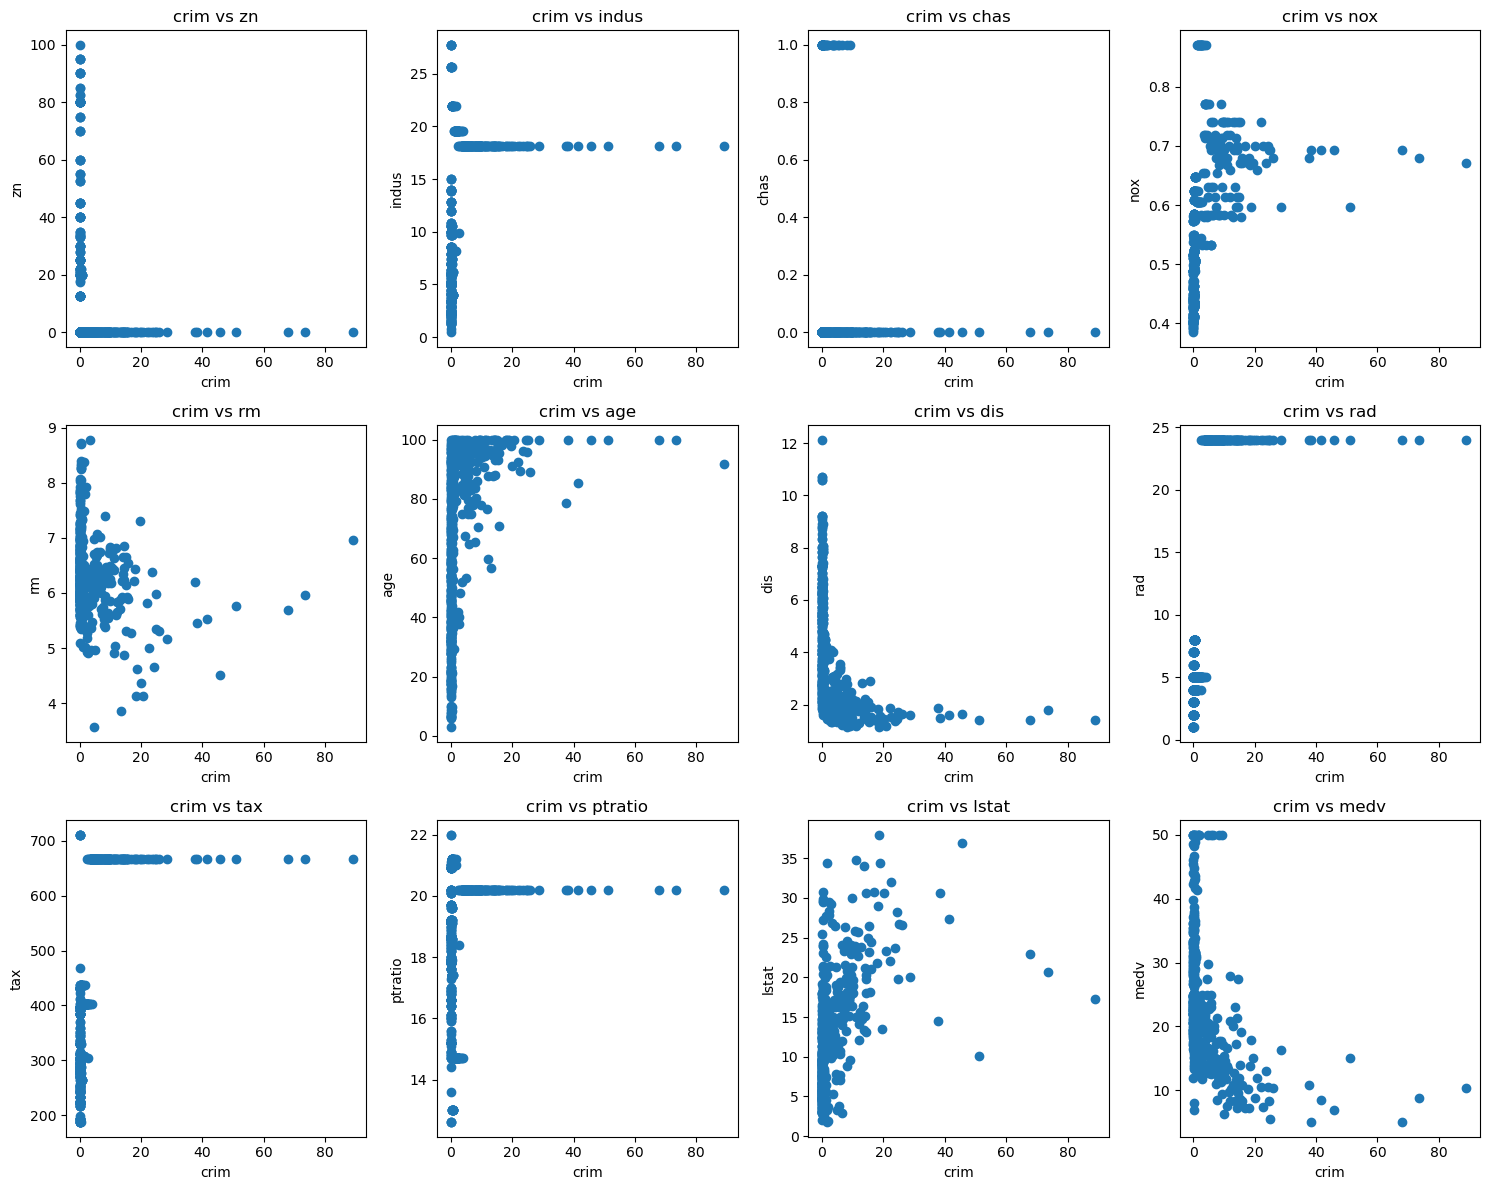

In [23]:
#(d)
bos_var=boston.columns
num_vars = len(bos_var) - 1  # 減去 'crim' 本身
cols = 4 # 每行顯示的子圖數
rows = (num_vars + cols - 1) // cols  # 總行數，向上取整

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))

# 去除多餘的子圖
for i in range(rows * cols):
    if i >= num_vars:
        fig.delaxes(axes.flatten()[i])

for i in range(1, len(bos_var)):
    row = (i - 1) // cols
    col = (i - 1) % cols
    ax = axes[row, col]
    sub_boston = boston[[bos_var[0], bos_var[i]]]
    ax.scatter(sub_boston[bos_var[0]], sub_boston[bos_var[i]])
    ax.set_xlabel(bos_var[0])
    ax.set_ylabel(bos_var[i])
    ax.set_title(f'{bos_var[0]} vs {bos_var[i]}')

plt.tight_layout()
plt.show()

- #### crim vs. rm :
#### There seems to be a negative correlation: as the number of rooms increases, the crime rate tends to decrease. This suggests that neighborhoods with larger homes tend to have lower crime rates.

- #### crim vs. nox :
#### A positive correlation is evident: higher NOX levels are associated with higher crime rates. Areas with more pollution might be linked to higher crime, potentially due to urbanization or industrialization.

- #### crim vs. dis:
#### There is a negative correlation: as the distance to employment centers increases, the crime rate tends to decrease. This indicates that areas farther from city centers (and possibly in suburban regions) experience lower crime rates.

- #### crim vs. lstat :
#### A positive correlation is visible: as the percentage of lower-status population increases, so does the crime rate. This suggests that areas with more socioeconomically disadvantaged populations tend to have higher crime rates.

- #### crim vs. rad  and Crim vs. tax:
#### There appears to be little correlation between these variables and the crime rate.

- #### Crim vs. medv :
#### A strong negative correlation: as the median value of homes increases, the crime rate decreases. This implies that wealthier neighborhoods experience lower crime rates.

In [29]:
#(e)
# 計算犯罪率統計數據
crim_stats = boston['crim'].describe()
print("犯罪率統計數據:")
print(crim_stats)

# 找出犯罪率特別高的郊區
high_crime = boston[boston['crim'] > crim_stats['75%']]
#print("犯罪率高於第 75 百分位數的區域:")
#print(high_crime)

# 計算郊區的稅率統計數據
tax_stats = boston['tax'].describe()
print("稅率統計數據:")
print(tax_stats)

# 找出稅率特別高的郊區
high_tax = boston[boston['tax'] > tax_stats['75%']]
#print("稅率高於第 75 百分位數的區域:")
#print(high_tax)

# 計算郊區的師生比率統計數據
ptr_stats = boston['ptratio'].describe()
print("師生比率統計數據:")
print(ptr_stats)

# 找出稅率特別高的郊區
high_ptr = boston[boston['ptratio'] > ptr_stats['75%']]
#print("師生比率高於第 75 百分位數的區域:")
#print(high_ptr)

print("犯罪率高於第 75 百分位數的區域:",high_crime.shape[0])
print("稅率高於第 75 百分位數的區域:",high_tax.shape[0])
print("師生比率高於第 75 百分位數的區域:",high_ptr.shape[0])

犯罪率統計數據:
count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64
稅率統計數據:
count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64
師生比率統計數據:
count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64
犯罪率高於第 75 百分位數的區域: 127
稅率高於第 75 百分位數的區域: 5
師生比率高於第 75 百分位數的區域: 56


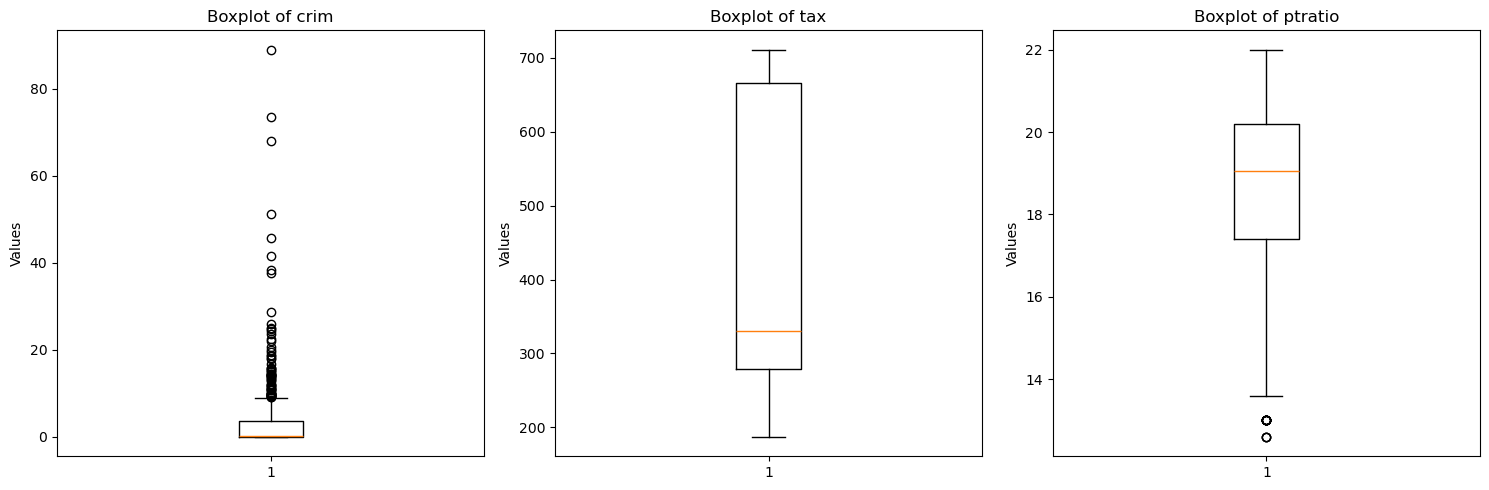

In [35]:
plt.figure(figsize=(15, 5))

# 第 1 個子圖：crim
plt.subplot(1, 3, 1)  # 1 行 3 列，第一個位置
plt.boxplot(boston['crim'])
plt.title('Boxplot of crim')
plt.ylabel('Values')

# 第 2 個子圖：tax
plt.subplot(1, 3, 2)  # 1 行 3 列，第二個位置
plt.boxplot(boston['tax'])
plt.title('Boxplot of tax')
plt.ylabel('Values')

# 第 3 個子圖：ptratio
plt.subplot(1, 3, 3)  # 1 行 3 列，第三個位置
plt.boxplot(boston['ptratio'])
plt.title('Boxplot of ptratio')
plt.ylabel('Values')

# 顯示圖表
plt.tight_layout()  # 自動調整子圖之間的間距
plt.show()

#### 'crim' has many outliers, which may be due to the fact that many areas have very low crime rates, while some areas have exceptionally high crime rates, resulting in a large number of outliers.

In [37]:
#(f)
near_river = boston[(boston['chas'] == 1)]
num_near_river = len(near_river)
print(f'Number of suburbs near the Charles River: {num_near_river}')

Number of suburbs near the Charles River: 35


In [41]:
#(g)
median_ptratio = boston['ptratio'].median()
print(f'The median pupil-teacher ratio among the towns is: {median_ptratio:.2f}')

The median pupil-teacher ratio among the towns is: 19.05


In [45]:
#(h)
lowest_medv = boston.loc[boston['medv'].idxmin()]

# 找到所有預測變數的範圍（最小值和最大值）
overall_ranges =boston.describe().loc[['min', 'max']]

# 比較該郊區的預測變數值與整體範圍
comparison = pd.DataFrame({'Suburb Value': lowest_medv, 
                           'Min Value': overall_ranges.loc['min'], 
                           'Max Value': overall_ranges.loc['max']})

# 輸出結果
print("Suburb with the lowest median value of owner-occupied homes:")
print(lowest_medv)
print("\nComparison of the suburb's values to overall ranges:")
print(comparison)

Suburb with the lowest median value of owner-occupied homes:
crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
lstat       30.5900
medv         5.0000
Name: 399, dtype: float64

Comparison of the suburb's values to overall ranges:
         Suburb Value  Min Value  Max Value
crim          38.3518    0.00632    88.9762
zn             0.0000    0.00000   100.0000
indus         18.1000    0.46000    27.7400
chas           0.0000    0.00000     1.0000
nox            0.6930    0.38500     0.8710
rm             5.4530    3.56100     8.7800
age          100.0000    2.90000   100.0000
dis            1.4896    1.12960    12.1265
rad           24.0000    1.00000    24.0000
tax          666.0000  187.00000   711.0000
ptratio       20.2000   12.60000    22.0000
lstat         30.5900    1.73000    37.9700
medv           5.0000    5.

####  The 399th suburb has the lowest medv. Compared to all suburbs, it can be seen that its 'crim', 'nox', 'age', 'rad', 'tax', 'ptratio', and 'lstat' are all relatively high. This suggests that this suburb may be relatively older and more remote, which corresponds to its low price.

In [50]:
#(i)
morethan7rooms = boston[(boston['rm'] > 7)]
morethan8rooms = boston[(boston['rm'] > 8)]
num_morethan7rooms = len(morethan7rooms)
num_morethan8rooms = len(morethan8rooms)
print(f'Number of suburbs more than 7 rooms: {num_morethan7rooms}')
print(f'Number of suburbs more than 8 rooms: {num_morethan8rooms}')

Number of suburbs more than 7 rooms: 64
Number of suburbs more than 8 rooms: 13


In [82]:
display(morethan8rooms)
lessthan8rooms = boston[(boston['rm'] <= 8)]
room8=morethan8rooms.describe()
room=lessthan8rooms.describe()
mean_values_df = pd.DataFrame({
    'Room8_Mean': room8.loc['mean'],
    'other_Mean': room.loc['mean']
})

print(mean_values_df)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
98,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,4.21,38.7
164,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,3.32,50.0
205,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,2.88,50.0
225,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,4.14,44.8
226,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,4.63,50.0
227,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,3.13,37.6
233,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,2.47,41.7
234,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,3.95,48.3
254,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,3.54,42.8
258,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,5.12,50.0


         Room8_Mean  other_Mean
crim       0.718795    3.689855
zn        13.615385   11.304260
indus      7.078462   11.243793
chas       0.153846    0.066937
nox        0.539238    0.555103
rm         8.348538    6.230211
age       71.538462   68.496755
dis        3.430192    3.804663
rad        7.461538    9.604462
tax      325.076923  410.430020
ptratio   16.361538   18.510751
lstat      4.310000   12.873063
medv      44.200000   21.961460


#### This represents the average values of other variables for suburbs with more than eight rooms, compared to the average values for the remaining suburbs. Notably, the suburbs with more than eight rooms have a higher average medv and a lower average lstat.

## 3 [Portfolio Management]

In [93]:
stocks=pd.read_csv("Stocks_ClosePrice.csv")
display(stocks)


,Date,FB,GOOG,NFLX,AMZN,AAPL,FB.1,GOOG.1,NFLX.1,AMZN.1,AAPL.1
0,2018/9/24,165.410004,1173.369995,369.609985,1934.359985,220.789993,NaN,NaN,NaN,NaN,NaN
1,2018/9/25,164.910004,1184.650024,369.429993,1974.550049,222.190002,-0.003027,0.009567,-0.000487,0.020564,0.006321
2,2018/9/26,166.949997,1180.489990,377.880005,1974.849976,220.419998,0.012294,-0.003518,0.022615,0.000152,-0.007998
3,2018/9/27,168.839996,1194.640015,380.709991,2012.979980,224.949997,0.011257,0.011915,0.007461,0.019124,0.020343
4,2018/9/28,164.460007,1193.469971,374.130005,2003.000000,225.740005,-0.026284,-0.000980,-0.017435,-0.004970,0.003506
...,...,...,...,...,...,...,...,...,...,...,...
245,2019/9/16,186.220001,1231.300049,294.290009,1807.839966,219.899994,-0.005195,-0.006686,0.000476,-0.017274,0.005243
246,2019/9/17,188.080002,1229.150024,298.600006,1822.550049,220.699997,0.009939,-0.001748,0.014539,0.008104,0.003631
247,2019/9/18,188.139999,1232.410034,291.559998,1817.459961,222.770004,0.000319,0.002649,-0.023859,-0.002797,0.009336
248,2019/9/19,190.139999,1238.709961,286.600006,1821.500000,220.960007,0.010574,0.005099,-0.017158,0.002220,-0.008158


In [95]:
#(a)
var=stocks.columns
for i in range(6, len(var)):
    print(f"Mean of {var[i]}: {stocks[var[i]].mean()}")
    print(f"standard deviation of {var[i]}: {stocks[var[i]].std()}")


Mean of FB.1: 0.0005551336265060239
standard deviation of FB.1: 0.02094346426452309
Mean of GOOG.1: 0.0001890656811244978
standard deviation of GOOG.1: 0.018473886303722178
Mean of NFLX.1: -0.001250009935742972
standard deviation of NFLX.1: 0.027119151623318856
Mean of AMZN.1: -0.0003021668590361445
standard deviation of AMZN.1: 0.022312607006382497
Mean of AAPL.1: -5.6049195582329234e-05
standard deviation of AAPL.1: 0.02042055804621317


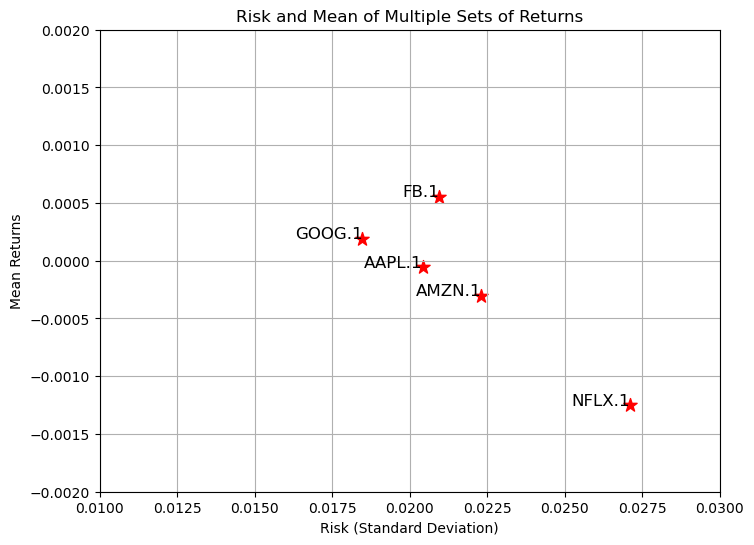

In [97]:
#(b)
means=[]
risks=[]
for i in range(6, len(var)):
    means.append(stocks[var[i]].mean())  # 使用 append() 方法添加元素
    risks.append(stocks[var[i]].std())    # 使用 append() 方法添加元素

# 創建圖形
plt.figure(figsize=(8, 6))

# 繪製每組均值和風險的紅色星星
plt.scatter(risks, means,  color='red', s=100, marker='*')
for i, stock in enumerate(var[6:]):
    plt.text(risks[i], means[i], stock, fontsize=12, ha='right')

# 添加標籤和標題
plt.title('Risk and Mean of Multiple Sets of Returns')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Mean Returns')
plt.xlim(0.01, 0.03)
plt.ylim(-0.002, 0.002)

# 顯示網格
plt.grid()

# 顯示圖形
plt.show()

In [99]:
#(c)
returns = stocks[['FB.1','GOOG.1','NFLX.1','AMZN.1','AAPL.1']]
returns=returns.drop(index=0)
covariance_matrix = np.cov(returns, rowvar=False)

print("Covariance Matrix:\n", covariance_matrix)

Covariance Matrix:
 [[0.00043863 0.00025792 0.00030246 0.00031941 0.00023645]
 [0.00025792 0.00034128 0.00030775 0.00030673 0.00024614]
 [0.00030246 0.00030775 0.00073545 0.0004266  0.00031043]
 [0.00031941 0.00030673 0.0004266  0.00049785 0.00031595]
 [0.00023645 0.00024614 0.00031043 0.00031595 0.000417  ]]


In [101]:
n_assets = 5
weights = np.random.rand(n_assets)
weights /= np.sum(weights)

mean_portfolio = np.dot(weights, means)
risk_portfolio = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))

# 輸出結果
print("Random Weights:", weights)
print("Mean of Portfolio:", mean_portfolio)
print("Standard Deviation of Portfolio:", risk_portfolio)

Random Weights: [0.06414476 0.12911847 0.1844559  0.14547506 0.4768058 ]
Mean of Portfolio: -0.00024123325404524788
Standard Deviation of Portfolio: 0.01864212097660863


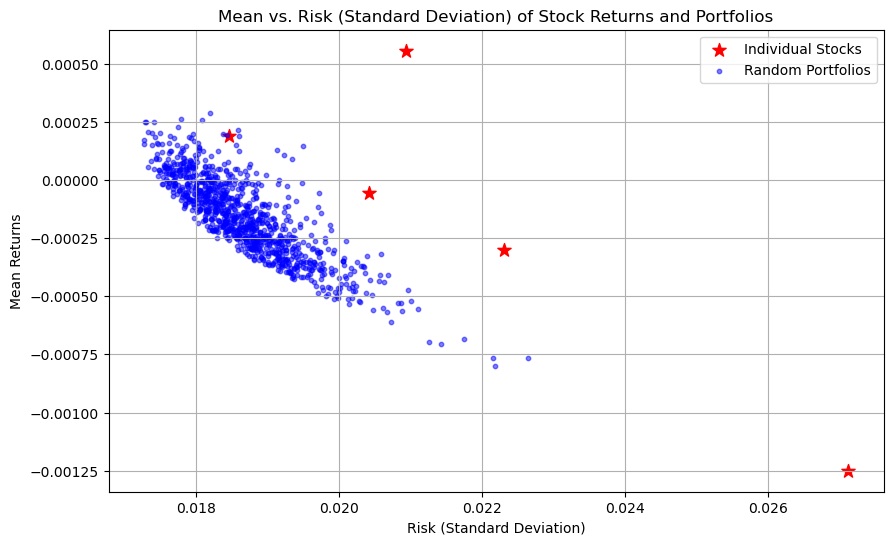

In [103]:
#(d)
means_1000 = []
risks_1000 = []
n_iterations=1000
n_assets=5
for _ in range(n_iterations):
    # 隨機生成權重並確保其非負且總和為1
    weights = np.random.rand(n_assets)
    weights /= np.sum(weights)

    # 計算投資組合的預期收益和風險
    mean_portfolio = np.dot(weights, means)
    risk_portfolio = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))

    # 儲存均值和風險
    means_1000.append(mean_portfolio)
    risks_1000.append(risk_portfolio)

# 繪製均值和風險
plt.figure(figsize=(10, 6))
plt.scatter(risks, means, color='red', s=100, marker='*', label='Individual Stocks')
plt.scatter(risks_1000, means_1000, color='blue', alpha=0.5, s=10, label='Random Portfolios')  # 使用藍色點標示
plt.title('Mean vs. Risk (Standard Deviation) of Stock Returns and Portfolios')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Mean Returns')
plt.legend()

# 顯示網格
plt.grid()

# 顯示圖形
plt.show()

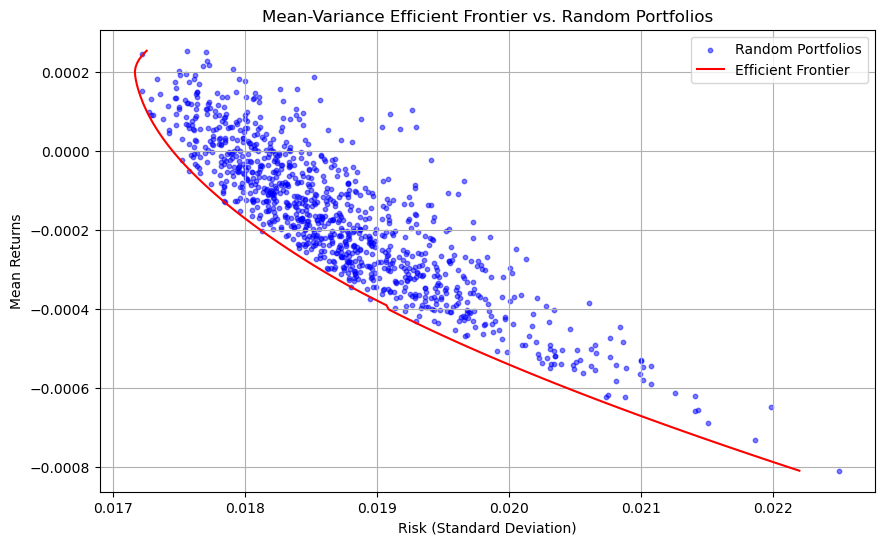

In [116]:
#(e)
means=[]
risks=[]
for i in range(6, len(var)):
    means.append(stocks[var[i]].mean())  # 使用 append() 方法添加元素
    risks.append(stocks[var[i]].std())    # 使用 append() 方法添加元素
returns = stocks[['FB.1','GOOG.1','NFLX.1','AMZN.1','AAPL.1']]
returns=returns.drop(index=0)
covariance_matrix = np.cov(returns, rowvar=False)
n_assets = len(means)
n_iterations = 1000

# Store means and risks for random portfolios
means_1000 = []
risks_1000 = []

# Generate random portfolios
for _ in range(n_iterations):
    weights = np.random.rand(n_assets)
    weights /= np.sum(weights)
    
    mean_portfolio = np.dot(weights, means)
    risk_portfolio = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    
    means_1000.append(mean_portfolio)
    risks_1000.append(risk_portfolio)

# Calculate the efficient frontier
efficient_fronter_return_range = np.linspace(min(means_1000), max(means_1000), 100)
efficient_fronter_risk_list = []

def portfolio_performance(weights):
    mean_return = np.dot(weights, means)
    risk = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return risk, mean_return

def minimize_risk(weights):
    return portfolio_performance(weights)[0]  # Return risk

bounds = tuple((0, 1) for _ in range(n_assets))

for target in efficient_fronter_return_range:
    constraints = [
        {'type': 'eq', 'fun': lambda x: np.dot(x, means) - target},  # Target return
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}  # Weights sum to 1
    ]
    initial_weights = n_assets * [1. / n_assets]
    result = minimize(minimize_risk, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    efficient_fronter_risk_list.append(result.fun)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(risks_1000, means_1000, color='blue', alpha=0.5, s=10, label='Random Portfolios')
plt.plot(efficient_fronter_risk_list, efficient_fronter_return_range, color='red', label='Efficient Frontier')
plt.title('Mean-Variance Efficient Frontier vs. Random Portfolios')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Mean Returns')
plt.legend()
plt.grid()
plt.show()